In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

trainDataframe = pd.read_csv("processed_data/preprocessed_data_v1_g_c_train.csv")

In [5]:
trainDataframe.set_index("id", inplace=True)
#trainDataframe.reset_index().set_index("index")
# trainDataframe

In [6]:
X = trainDataframe.drop(["playtime_forever"], axis=1)
y = trainDataframe["playtime_forever"]

In [ ]:
sklearn.model_selection.GridSearchCV

In [7]:

#X_train, X_test, y_train, y_test = train_test_split(
#   X, y, test_size=0.2, random_state=0)

#print(X_train.shape)
#print(y_train.shape)
#print(y_test.shape)

testDF = pd.read_csv("processed_data/preprocessed_data_v1_g_c_test.csv")
#testDF.reset_index().set_index("index", inplace = True)
testDF.set_index("id", inplace = True)
#print(testDF.shape)
#print(X_train.shape)
#predict_y = model.predict(testDF)


X_testDF = testDF

print(X.shape)
print(y.shape)
print(X_testDF.shape)
#testResult.to_csv("result.csv", index=False)

(357, 52)
(357,)
(90, 52)


========TRAIN =============
Mean squared error: 9.18
===========TEST=========================


/Users/yuking/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


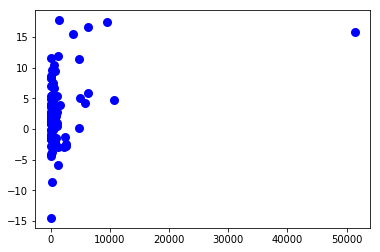

In [8]:
model = skl.LinearRegression()
model.fit(X, y)

predict_y = model.predict(X)

print('========TRAIN =============')
# The coefficients
#print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % sqrt(mean_squared_error(y, predict_y)))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_train, predict_y))

print('===========TEST=========================')
predict_y = model.predict(X_testDF)
# The mean squared error
#print("Mean squared error: %.2f"
#      % mean_squared_error(y_test, predict_y))
# Plot outputs
#plt.scatter(X_test.iloc[:,1], y_test,  color='black')
plt.scatter(X_testDF.iloc[:,1], predict_y, color='blue', linewidth=3)

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_test, predict_y))


#plt.xticks(())
#plt.yticks(())

plt.show()

#print("training accuracy:", (predict_y == y_train).sum()/ len(predict_y))

#predict_y = model.predict(X_test, axis = 1)
#print("testing accuracy:", (predict_y == y_test).sum()/ len(predict_y))

========TRAIN =============
Mean squared error: 10.13
===========TEST=========================


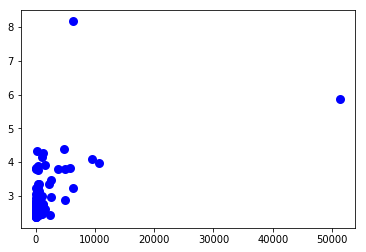

In [58]:
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=50,max_depth=3, min_samples_split=2, min_samples_leaf=2, subsample=1,max_features='sqrt', random_state=10)
model.fit(X,y)

predict_y = model.predict(X)

print('========TRAIN =============')
# The coefficients
#print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % sqrt(mean_squared_error(y, predict_y)))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_train, predict_y))

print('===========TEST=========================')
predict_y = model.predict(X_testDF)
plt.scatter(X_testDF.iloc[:,1], predict_y, color='blue', linewidth=3)
plt.show()

========TRAIN =============
Mean squared error: 9.64
===========TEST=========================


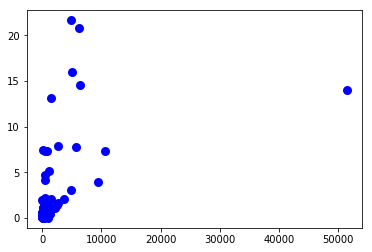

In [56]:
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X,y)

predict_y = model.predict(X)

print('========TRAIN =============')
# The coefficients
#print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % sqrt(mean_squared_error(y, predict_y)))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_train, predict_y))

print('===========TEST=========================')
predict_y = model.predict(X_testDF)
plt.scatter(X_testDF.iloc[:,1], predict_y, color='blue', linewidth=3)
plt.show()

In [59]:
df = pd.DataFrame({'playtime_forever':predict_y})
df[df < 0] = 0
df.index.name = 'id'
df
df.to_csv('result_gbregressor_50_t.csv',index=True)